In [1]:
import pandas as pd

# Read the parquet file
file_path = r"C:\Users\sffra\Downloads\BSE 2025-2026\Ad_Campgain\message-campaign-engagement-analysis\sampling\data\combined_dataset.parquet"
df = pd.read_parquet(file_path)

# Basic information about the dataset
print("=" * 50)
print("DATASET OVERVIEW")
print("=" * 50)

# Shape
print(f"\nShape: {df.shape}")
print(f"  - Rows: {df.shape[0]:,}")
print(f"  - Columns: {df.shape[1]}")

# Memory usage
print(f"\nMemory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


DATASET OVERVIEW

Shape: (1686884, 51)
  - Rows: 1,686,884
  - Columns: 51

Memory Usage: 1936.02 MB


In [ ]:
print("\n" + "=" * 80)
print("ALL COLUMNS WITH DATA TYPES")
print("=" * 80)
print(f"\nTotal Columns: {len(df.columns)}\n")

for i, (col, dtype) in enumerate(df.dtypes.items(), 1):
    non_null = df[col].notna().sum()
    null_count = df[col].isna().sum()
    null_pct = (null_count / len(df)) * 100
    print(f"{i:3d}. {col:45s} | {str(dtype):15s} | Non-null: {non_null:>10,} ({100-null_pct:5.1f}%) | Null: {null_count:>8,}")

In [ ]:
print("\n" + "=" * 80)
print("KEY COLUMN IDENTIFICATION")
print("=" * 80)

# Customer identifier
print("\n1. CUSTOMER IDENTIFIER:")
print(f"   - client_id (unique customers: {df['client_id'].nunique():,})")
print(f"   - Avg messages per customer: {len(df) / df['client_id'].nunique():.2f}")

# Channels
print("\n2. CHANNELS:")
print(f"   - channel_x: {df['channel_x'].unique()}")
print(f"   - channel_y: {df['channel_y'].unique()}")

# Message types
print("\n3. MESSAGE/CAMPAIGN TYPES:")
print(f"   - message_type: {df['message_type'].unique()}")
print(f"   - campaign_type: {df['campaign_type'].unique()}")

# Binary outcomes
print("\n4. BINARY OUTCOMES:")
print(f"   - is_opened:       {df['is_opened'].sum():,} ({df['is_opened'].mean()*100:.2f}%)")
print(f"   - is_clicked:      {df['is_clicked'].sum():,} ({df['is_clicked'].mean()*100:.2f}%)")
print(f"   - is_purchased:    {df['is_purchased'].sum():,} ({df['is_purchased'].mean()*100:.2f}%)")
print(f"   - is_unsubscribed: {df['is_unsubscribed'].sum():,} ({df['is_unsubscribed'].mean()*100:.2f}%)")

# Date range
print("\n5. TIME PERIOD:")
print(f"   - sent_at range: {df['sent_at'].min()} to {df['sent_at'].max()}")
print(f"   - Duration: {(df['sent_at'].max() - df['sent_at'].min()).days} days")

NA at "sent_at" column 

In [ ]:
print("\n" + "=" * 80)
print("INVESTIGATING MISSING sent_at VALUES")
print("=" * 80)

# Find rows with missing sent_at
missing_sent_at = df[df['sent_at'].isna()]

print(f"\nTotal records with missing sent_at: {len(missing_sent_at)}")
print(f"Percentage of dataset: {len(missing_sent_at)/len(df)*100:.3f}%")

# Check what these records look like
print("\n--- Characteristics of records with missing sent_at ---")

# Channel distribution
print("\nChannel distribution:")
print(missing_sent_at['channel_x'].value_counts())

# Message type distribution  
print("\nMessage type distribution:")
print(missing_sent_at['message_type'].value_counts())

# Campaign type distribution
print("\nCampaign type distribution:")
print(missing_sent_at['campaign_type'].value_counts())

# Check outcomes for these missing records
print("\n--- Outcomes for missing sent_at records ---")
print(f"is_opened:       {missing_sent_at['is_opened'].sum()} ({missing_sent_at['is_opened'].mean()*100:.2f}%)")
print(f"is_clicked:      {missing_sent_at['is_clicked'].sum()} ({missing_sent_at['is_clicked'].mean()*100:.2f}%)")
print(f"is_purchased:    {missing_sent_at['is_purchased'].sum()} ({missing_sent_at['is_purchased'].mean()*100:.2f}%)")

# Check other date fields
print("\n--- Other date fields for these records ---")
print(f"created_at populated: {missing_sent_at['created_at'].notna().sum()}")
print(f"updated_at populated: {missing_sent_at['updated_at'].notna().sum()}")
print(f"date field populated: {missing_sent_at['date'].notna().sum()}")

# Show a few sample records
print("\n--- Sample of records with missing sent_at (first 5) ---")
print(missing_sent_at[['id', 'client_id', 'channel_x', 'message_type', 'sent_at', 'date', 'created_at', 'is_opened', 'is_clicked']].head())

TEMPORAL DISTRIBUTION OF EVENTS - All Messages

In [ ]:
print("\n" + "=" * 80)
print("TEMPORAL PATTERNS")
print("=" * 80)

# Convert sent_at to datetime if needed and extract temporal features
df['sent_date'] = pd.to_datetime(df['sent_at']).dt.date
df['sent_hour'] = pd.to_datetime(df['sent_at']).dt.hour
df['sent_dayofweek'] = pd.to_datetime(df['sent_at']).dt.dayofweek  # 0=Monday, 6=Sunday
df['sent_month'] = pd.to_datetime(df['sent_at']).dt.to_period('M')

# Messages by month
print("\nMessages sent by month:")
monthly_counts = df['sent_month'].value_counts().sort_index()
print(monthly_counts.head(10))
print("...")
print(monthly_counts.tail(10))

# Messages by day of week (filter out NaN)
print("\nMessages by day of week:")
dow_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_counts = df['sent_dayofweek'].dropna().value_counts().sort_index()
for day, count in dow_counts.items():
    day_int = int(day)  # Convert to int to use as index
    print(f"  {dow_names[day_int]:10s}: {count:,} ({count/len(df)*100:.1f}%)")

# Messages by hour
print("\nTop 10 hours for sending messages:")
hour_counts = df['sent_hour'].value_counts().sort_index()
print(hour_counts.head(10))

Viz for temporal patterns

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "=" * 80)
print("TEMPORAL PATTERNS")
print("=" * 80)

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# Convert sent_at to datetime if needed and extract temporal features
df['sent_date'] = pd.to_datetime(df['sent_at']).dt.date
df['sent_hour'] = pd.to_datetime(df['sent_at']).dt.hour
df['sent_dayofweek'] = pd.to_datetime(df['sent_at']).dt.dayofweek  # 0=Monday, 6=Sunday
df['sent_month'] = pd.to_datetime(df['sent_at']).dt.to_period('M')

# Create a figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# 1. Messages by month (time series)
monthly_counts = df['sent_month'].value_counts().sort_index()
monthly_counts.index = monthly_counts.index.to_timestamp()  # Convert Period to timestamp for plotting
axes[0].plot(monthly_counts.index, monthly_counts.values, marker='o', linewidth=2, markersize=6)
axes[0].set_title('Messages Sent by Month (Apr 2021 - Apr 2023)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Month', fontsize=12)
axes[0].set_ylabel('Number of Messages', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# 2. Messages by day of week
dow_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_counts = df['sent_dayofweek'].dropna().value_counts().sort_index()
axes[1].bar(range(7), [dow_counts.get(i, 0) for i in range(7)], color='steelblue', edgecolor='black')
axes[1].set_title('Messages by Day of Week', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Day of Week', fontsize=12)
axes[1].set_ylabel('Number of Messages', fontsize=12)
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(dow_names, rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

# 3. Messages by hour
hour_counts = df['sent_hour'].dropna().value_counts().sort_index()
axes[2].bar(hour_counts.index, hour_counts.values, color='coral', edgecolor='black')
axes[2].set_title('Messages by Hour of Day', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Hour (24-hour format)', fontsize=12)
axes[2].set_ylabel('Number of Messages', fontsize=12)
axes[2].set_xticks(range(0, 24))
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('temporal_patterns.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'temporal_patterns.png'")
plt.show()


In [ ]:

# Print summary stats
# Print summary stats
print("\nSummary Statistics:")
print(f"Most active month: {monthly_counts.idxmax()} with {monthly_counts.max():,} messages")
print(f"Most active day: {dow_names[int(dow_counts.idxmax())]} with {dow_counts.max():,} messages")
print(f"Most active hour: {int(hour_counts.idxmax())}:00 with {hour_counts.max():,} messages")

Temporal patterns just for bulk campagin

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "=" * 80)
print("TEMPORAL PATTERNS - BULK ONLY")
print("=" * 80)

# Filter to bulk campaigns
df_bulk = df[df['campaign_type'] == 'bulk'].copy()

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# Convert sent_at to datetime if needed and extract temporal features
df_bulk['sent_date'] = pd.to_datetime(df_bulk['sent_at']).dt.date
df_bulk['sent_hour'] = pd.to_datetime(df_bulk['sent_at']).dt.hour
df_bulk['sent_dayofweek'] = pd.to_datetime(df_bulk['sent_at']).dt.dayofweek  # 0=Monday, 6=Sunday
df_bulk['sent_month'] = pd.to_datetime(df_bulk['sent_at']).dt.to_period('M')

# Create a figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# 1. Messages by month (time series)
monthly_counts = df_bulk['sent_month'].value_counts().sort_index()
monthly_counts.index = monthly_counts.index.to_timestamp()  # Convert Period to timestamp for plotting
axes[0].plot(monthly_counts.index, monthly_counts.values, marker='o', linewidth=2, markersize=6)
axes[0].set_title('Messages Sent by Month (Bulk Campaigns)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Month', fontsize=12)
axes[0].set_ylabel('Number of Messages', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# 2. Messages by day of week
dow_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_counts = df_bulk['sent_dayofweek'].dropna().value_counts().sort_index()
axes[1].bar(range(7), [dow_counts.get(i, 0) for i in range(7)], color='steelblue', edgecolor='black')
axes[1].set_title('Messages by Day of Week (Bulk Campaigns)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Day of Week', fontsize=12)
axes[1].set_ylabel('Number of Messages', fontsize=12)
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(dow_names, rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

# 3. Messages by hour
hour_counts = df_bulk['sent_hour'].dropna().value_counts().sort_index()
axes[2].bar(hour_counts.index, hour_counts.values, color='coral', edgecolor='black')
axes[2].set_title('Messages by Hour of Day (Bulk Campaigns)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Hour (24-hour format)', fontsize=12)
axes[2].set_ylabel('Number of Messages', fontsize=12)
axes[2].set_xticks(range(0, 24))
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('temporal_patterns_bulk.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'temporal_patterns_bulk.png'")
plt.show()


Looking at open, click and purchase rates (for all) by:
-Month/Year
-Month (unique)
-Day of Week
-Hour

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "=" * 80)
print("TIME TRENDS ANALYSIS")
print("=" * 80)

# Ensure datetime column exists
if 'sent_datetime' not in df.columns:
    df['sent_datetime'] = pd.to_datetime(df['sent_at'])

# Monthly aggregation
print("Calculating monthly metrics...")
monthly = df.groupby(df['sent_datetime'].dt.to_period('M')).agg({
    'client_id': 'count',  # total messages
    'is_opened': ['sum', 'mean'],
    'is_clicked': ['sum', 'mean'],
    'is_purchased': ['sum', 'mean']
}).round(4)

monthly.columns = ['total_messages', 'opens', 'open_rate', 'clicks', 'click_rate', 
                   'purchases', 'purchase_rate']
monthly = monthly.reset_index()
monthly['sent_datetime'] = monthly['sent_datetime'].dt.to_timestamp()
monthly['open_rate'] *= 100
monthly['click_rate'] *= 100
monthly['purchase_rate'] *= 100

# Calculate CTOR (Click-to-Open Rate)
monthly['ctor'] = (monthly['clicks'] / monthly['opens'] * 100).round(2)

# Create clean 4-panel visualization
fig, axes = plt.subplots(4, 1, figsize=(16, 13))
fig.suptitle('Engagement Metrics Over Time (Apr 2021 - Apr 2023)', 
             fontsize=16, fontweight='bold')

# Define metrics
metrics = [
    ('open_rate', 'Open Rate (%)', 'total_messages', 'Messages Sent', 'steelblue'),
    ('click_rate', 'Click Rate (%)', 'total_messages', 'Messages Sent', 'coral'),
    ('purchase_rate', 'Purchase Rate (%)', 'total_messages', 'Messages Sent', 'green'),
    ('ctor', 'Click-to-Open Rate (%)', 'opens', 'Total Opens', 'purple')
]

for idx, (metric, label, volume_col, volume_label, color) in enumerate(metrics):
    ax = axes[idx]
    ax2 = ax.twinx()
    
    # Rate line (left axis)
    line = ax.plot(monthly['sent_datetime'], monthly[metric], 
                   marker='o', linewidth=2.5, markersize=5, color=color, 
                   label=label, zorder=3)
    ax.set_ylabel(label, color=color, fontsize=12, fontweight='bold')
    ax.tick_params(axis='y', labelcolor=color)
    ax.grid(True, alpha=0.3, zorder=1)
    
    # Volume bars (right axis)
    bars = ax2.bar(monthly['sent_datetime'], monthly[volume_col], 
                   alpha=0.15, color='gray', width=20, zorder=2)
    ax2.set_ylabel(volume_label, color='gray', fontsize=11)
    ax2.tick_params(axis='y', labelcolor='gray')
    
    # Add mean line
    mean_val = monthly[metric].mean()
    ax.axhline(y=mean_val, color=color, linestyle='--', alpha=0.4, linewidth=1.5)
    ax.text(monthly['sent_datetime'].iloc[-1], mean_val, 
            f' avg: {mean_val:.2f}%', va='center', fontsize=9, color=color)
    
    if idx == 3:
        ax.set_xlabel('Month', fontsize=12)

plt.tight_layout()
plt.savefig('time_trends_clean.png', dpi=150, bbox_inches='tight')
print("✓ Saved: time_trends_clean.png")
plt.close()

# Summary statistics
print("\n" + "=" * 80)
print("KEY TAKEAWAYS")
print("=" * 80)

print(f"\nOverall Period: {monthly['sent_datetime'].min().strftime('%b %Y')} to {monthly['sent_datetime'].max().strftime('%b %Y')}")
print(f"Total Messages: {monthly['total_messages'].sum():,}")
print(f"Avg Messages/Month: {monthly['total_messages'].mean():,.0f}")

print("\nAverage Engagement Rates:")
print(f"  Open Rate:           {monthly['open_rate'].mean():.2f}%")
print(f"  Click Rate:          {monthly['click_rate'].mean():.2f}%")
print(f"  Purchase Rate:       {monthly['purchase_rate'].mean():.2f}%")
print(f"  Click-to-Open Rate:  {monthly['ctor'].mean():.2f}%")

print("\nStability (Coefficient of Variation):")
print(f"  Open Rate:           {(monthly['open_rate'].std() / monthly['open_rate'].mean()):.2f}")
print(f"  Click Rate:          {(monthly['click_rate'].std() / monthly['click_rate'].mean()):.2f}")
print(f"  Purchase Rate:       {(monthly['purchase_rate'].std() / monthly['purchase_rate'].mean()):.2f}")
print(f"  Click-to-Open Rate:  {(monthly['ctor'].std() / monthly['ctor'].mean()):.2f}")

print("\nMonthly Range:")
print(f"  Open Rate:           {monthly['open_rate'].min():.2f}% to {monthly['open_rate'].max():.2f}%")
print(f"  Click Rate:          {monthly['click_rate'].min():.2f}% to {monthly['click_rate'].max():.2f}%")
print(f"  Purchase Rate:       {monthly['purchase_rate'].min():.2f}% to {monthly['purchase_rate'].max():.2f}%")
print(f"  Click-to-Open Rate:  {monthly['ctor'].min():.2f}% to {monthly['ctor'].max():.2f}%")

print("\nKey Insights:")
print(f"  → {monthly['opens'].sum():,} messages opened ({monthly['open_rate'].mean():.1f}% of sent)")
print(f"  → {monthly['clicks'].sum():,} clicks ({monthly['click_rate'].mean():.2f}% of sent, {monthly['ctor'].mean():.1f}% of opens)")
print(f"  → {monthly['purchases'].sum():,} purchases ({monthly['purchase_rate'].mean():.3f}% of sent)")

# Export summary table
monthly_export = monthly[['sent_datetime', 'total_messages', 'opens', 'clicks',
                          'open_rate', 'click_rate', 'purchase_rate', 'ctor']].copy()
monthly_export['sent_datetime'] = monthly_export['sent_datetime'].dt.strftime('%Y-%m')
monthly_export.columns = ['Month', 'Messages', 'Opens', 'Clicks', 
                          'Open_Rate_%', 'Click_Rate_%', 'Purchase_Rate_%', 'CTOR_%']
monthly_export.to_csv('monthly_engagement_summary.csv', index=False)
print("\n✓ Saved: monthly_engagement_summary.csv")

Repeating exact same time trends above just with bulk campaign messages only

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "=" * 80)
print("TIME TRENDS ANALYSIS - BULK ONLY")
print("=" * 80)

# Filter to bulk campaigns
df_bulk = df[df['campaign_type'] == 'bulk'].copy()

# Ensure datetime column exists
if 'sent_datetime' not in df_bulk.columns:
    df_bulk['sent_datetime'] = pd.to_datetime(df_bulk['sent_at'])

# Monthly aggregation
print("Calculating monthly metrics (bulk only)...")
monthly = df_bulk.groupby(df_bulk['sent_datetime'].dt.to_period('M')).agg({
    'client_id': 'count',  # total messages
    'is_opened': ['sum', 'mean'],
    'is_clicked': ['sum', 'mean'],
    'is_purchased': ['sum', 'mean']
}).round(4)

monthly.columns = [
    'total_messages', 'opens', 'open_rate',
    'clicks', 'click_rate', 'purchases', 'purchase_rate'
]

monthly = monthly.reset_index()
monthly['sent_datetime'] = monthly['sent_datetime'].dt.to_timestamp()
monthly['open_rate'] *= 100
monthly['click_rate'] *= 100
monthly['purchase_rate'] *= 100

# Calculate CTOR (Click-to-Open Rate)
monthly['ctor'] = (monthly['clicks'] / monthly['opens'] * 100).round(2)

# Create clean 4-panel visualization
fig, axes = plt.subplots(4, 1, figsize=(16, 13))
fig.suptitle(
    'Engagement Metrics Over Time - Bulk Campaigns (Apr 2021 - Apr 2023)',
    fontsize=16,
    fontweight='bold'
)

# Define metrics
metrics = [
    ('open_rate', 'Open Rate (%)', 'total_messages', 'Messages Sent', 'steelblue'),
    ('click_rate', 'Click Rate (%)', 'total_messages', 'Messages Sent', 'coral'),
    ('purchase_rate', 'Purchase Rate (%)', 'total_messages', 'Messages Sent', 'green'),
    ('ctor', 'Click-to-Open Rate (%)', 'opens', 'Total Opens', 'purple')
]

for idx, (metric, label, volume_col, volume_label, color) in enumerate(metrics):
    ax = axes[idx]
    ax2 = ax.twinx()
    
    # Rate line (left axis)
    line = ax.plot(
        monthly['sent_datetime'],
        monthly[metric],
        marker='o',
        linewidth=2.5,
        markersize=5,
        color=color,
        label=label,
        zorder=3
    )
    ax.set_ylabel(label, color=color, fontsize=12, fontweight='bold')
    ax.tick_params(axis='y', labelcolor=color)
    ax.grid(True, alpha=0.3, zorder=1)
    
    # Volume bars (right axis)
    bars = ax2.bar(
        monthly['sent_datetime'],
        monthly[volume_col],
        alpha=0.15,
        color='gray',
        width=20,
        zorder=2
    )
    ax2.set_ylabel(volume_label, color='gray', fontsize=11)
    ax2.tick_params(axis='y', labelcolor='gray')
    
    # Add mean line
    mean_val = monthly[metric].mean()
    ax.axhline(y=mean_val, color=color, linestyle='--', alpha=0.4, linewidth=1.5)
    ax.text(
        monthly['sent_datetime'].iloc[-1],
        mean_val,
        f' avg: {mean_val:.2f}%',
        va='center',
        fontsize=9,
        color=color
    )
    
    if idx == 3:
        ax.set_xlabel('Month', fontsize=12)

plt.tight_layout()
plt.savefig('time_trends_clean_bulk.png', dpi=150, bbox_inches='tight')
print("✓ Saved: time_trends_clean_bulk.png")
plt.close()

# Summary statistics
print("\n" + "=" * 80)
print("KEY TAKEAWAYS - BULK ONLY")
print("=" * 80)

print(f"\nOverall Period: {monthly['sent_datetime'].min().strftime('%b %Y')} "
      f"to {monthly['sent_datetime'].max().strftime('%b %Y')}")
print(f"Total Messages: {monthly['total_messages'].sum():,}")
print(f"Avg Messages/Month: {monthly['total_messages'].mean():,.0f}")

print("\nAverage Engagement Rates:")
print(f"  Open Rate:           {monthly['open_rate'].mean():.2f}%")
print(f"  Click Rate:          {monthly['click_rate'].mean():.2f}%")
print(f"  Purchase Rate:       {monthly['purchase_rate'].mean():.2f}%")
print(f"  Click-to-Open Rate:  {monthly['ctor'].mean():.2f}%")

print("\nStability (Coefficient of Variation):")
print(f"  Open Rate:           {(monthly['open_rate'].std() / monthly['open_rate'].mean()):.2f}")
print(f"  Click Rate:          {(monthly['click_rate'].std() / monthly['click_rate'].mean()):.2f}")
print(f"  Purchase Rate:       {(monthly['purchase_rate'].std() / monthly['purchase_rate'].mean()):.2f}")
print(f"  Click-to-Open Rate:  {(monthly['ctor'].std() / monthly['ctor'].mean()):.2f}")

print("\nMonthly Range:")
print(f"  Open Rate:           {monthly['open_rate'].min():.2f}% to {monthly['open_rate'].max():.2f}%")
print(f"  Click Rate:          {monthly['click_rate'].min():.2f}% to {monthly['click_rate'].max():.2f}%")
print(f"  Purchase Rate:       {monthly['purchase_rate'].min():.2f}% to {monthly['purchase_rate'].max():.2f}%")
print(f"  Click-to-Open Rate:  {monthly['ctor'].min():.2f}% to {monthly['ctor'].max():.2f}%")

print("\nKey Insights (Bulk):")
print(f"  → {monthly['opens'].sum():,} messages opened "
      f"({monthly['open_rate'].mean():.1f}% of sent)")
print(f"  → {monthly['clicks'].sum():,} clicks "
      f"({monthly['click_rate'].mean():.2f}% of sent, {monthly['ctor'].mean():.1f}% of opens)")
print(f"  → {monthly['purchases'].sum():,} purchases "
      f"({monthly['purchase_rate'].mean():.3f}% of sent)")

# Export summary table
monthly_export = monthly[[
    'sent_datetime', 'total_messages', 'opens', 'clicks',
    'open_rate', 'click_rate', 'purchase_rate', 'ctor'
]].copy()
monthly_export['sent_datetime'] = monthly_export['sent_datetime'].dt.strftime('%Y-%m')
monthly_export.columns = [
    'Month', 'Messages', 'Opens', 'Clicks',
    'Open_Rate_%', 'Click_Rate_%', 'Purchase_Rate_%', 'CTOR_%'
]
monthly_export.to_csv('monthly_engagement_summary_bulk.csv', index=False)
print("\n✓ Saved: monthly_engagement_summary_bulk.csv")


Part II: Cohort analysis

Look at change in engagement rates over time for different cohorts based on
-When they joined
-When they first purchased
-Their lifetime engagement

In [ ]:
import pandas as pd
import numpy as np

# ---- 0. Start from your existing df ----
# If you want bulk only, uncomment the next line instead:
# df = df[df['campaign_type'] == 'bulk'].copy()

df = df.copy()  # keep original safe

# Ensure datetime exists
if 'sent_datetime' not in df.columns:
    df['sent_datetime'] = pd.to_datetime(df['sent_at'])

# ---- 1. Per-user lifetime metrics ----
per_user = df.groupby('client_id').agg(
    n_messages=('client_id', 'count'),
    opens=('is_opened', 'sum'),
    clicks=('is_clicked', 'sum'),
    purchases=('is_purchased', 'sum'),
)

per_user['open_rate'] = per_user['opens'] / per_user['n_messages']
per_user['click_rate'] = per_user['clicks'] / per_user['n_messages']
per_user['purchase_rate'] = per_user['purchases'] / per_user['n_messages']

# Engagement score (weights can be tweaked)
per_user['engagement_score'] = (
    0.4 * per_user['open_rate'] +
    0.4 * per_user['click_rate'] +
    0.2 * per_user['purchase_rate']
)

# Quantiles for low/medium/high
q_low = per_user['engagement_score'].quantile(1/3)
q_high = per_user['engagement_score'].quantile(2/3)

def label_engagement(score):
    if pd.isna(score):
        return 'unknown'
    if score <= q_low:
        return 'low'
    elif score <= q_high:
        return 'medium'
    else:
        return 'high'

per_user['lifetime_engagement_level'] = per_user['engagement_score'].apply(label_engagement)

print("per_user columns:", per_user.columns.tolist())
print(per_user[['n_messages', 'engagement_score', 'lifetime_engagement_level']].head())


In [ ]:
# Add lifetime_engagement_level directly via map
df['lifetime_engagement_level'] = df['client_id'].map(
    per_user['lifetime_engagement_level']
)

print('Has lifetime_engagement_level in df?', 'lifetime_engagement_level' in df.columns)
print(df[['client_id', 'lifetime_engagement_level']].head())


In [ ]:
import matplotlib.pyplot as plt

# Make sure we have a datetime column
if 'sent_datetime' not in df.columns:
    df['sent_datetime'] = pd.to_datetime(df['sent_at'])

# First message per user
df['first_message_datetime'] = df.groupby('client_id')['sent_datetime'].transform('min')

# Days since first message = lifetime axis
df['days_since_first_message'] = (
    df['sent_datetime'] - df['first_message_datetime']
).dt.days

# Optional: restrict to first N days of life
MAX_DAYS = 180
df_life = df[df['days_since_first_message'].between(0, MAX_DAYS)].copy()


In [ ]:
metric_col = 'is_opened'          # or 'is_clicked', 'is_purchased'
metric_name = 'Open Rate (%)'     # update label if you change metric_col


In [ ]:
print("\n" + "=" * 80)
print("LIFETIME ENGAGEMENT CURVES BY ENGAGEMENT LEVEL")
print("=" * 80)

eng_by_level = (
    df_life
    .dropna(subset=['lifetime_engagement_level'])
    .groupby(['days_since_first_message', 'lifetime_engagement_level'])
    .agg(
        messages=('client_id', 'count'),
        engaged=(metric_col, 'sum')
    )
    .reset_index()
)

eng_by_level['rate'] = eng_by_level['engaged'] / eng_by_level['messages'] * 100

# Plot
fig, ax = plt.subplots(figsize=(14, 7))

for level, grp in eng_by_level.groupby('lifetime_engagement_level'):
    grp = grp.sort_values('days_since_first_message')
    ax.plot(
        grp['days_since_first_message'],
        grp['rate'],
        marker='o',
        linewidth=2,
        markersize=3,
        label=level.capitalize()
    )

ax.set_title(f'{metric_name} Over Customer Lifetime by Engagement Level',
             fontsize=15, fontweight='bold')
ax.set_xlabel('Days Since First Message', fontsize=12)
ax.set_ylabel(metric_name, fontsize=12)
ax.legend(title='Lifetime Engagement Level')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('lifetime_engagement_by_level.png', dpi=150, bbox_inches='tight')
print("✓ Saved: lifetime_engagement_by_level.png")
plt.show()

# Quick summary for first 30 days
summary_30 = (
    eng_by_level[eng_by_level['days_since_first_message'] <= 30]
    .groupby('lifetime_engagement_level')['rate']
    .mean()
    .round(2)
)
print("\nAverage engagement in first 30 days by level:")
print(summary_30)


In [ ]:
print("\n" + "=" * 80)
print("LIFETIME ENGAGEMENT CURVES BY SIGNUP MONTH COHORT")
print("=" * 80)

# Keep rows that have signup_month
cohort_df = df_life.dropna(subset=['signup_month']).copy()
cohort_df['signup_label'] = cohort_df['signup_month'].dt.strftime('%Y-%m')

# Pick top 4 cohorts by user count
top_signup = (
    cohort_df
    .groupby('signup_label')['client_id']
    .nunique()
    .sort_values(ascending=False)
    .head(4)
    .index
)

cohort_df = cohort_df[cohort_df['signup_label'].isin(top_signup)]

eng_by_signup = (
    cohort_df
    .groupby(['days_since_first_message', 'signup_label'])
    .agg(
        messages=('client_id', 'count'),
        engaged=(metric_col, 'sum')
    )
    .reset_index()
)
eng_by_signup['rate'] = eng_by_signup['engaged'] / eng_by_signup['messages'] * 100

# Plot
fig, ax = plt.subplots(figsize=(14, 7))

for label, grp in eng_by_signup.groupby('signup_label'):
    grp = grp.sort_values('days_since_first_message')
    ax.plot(
        grp['days_since_first_message'],
        grp['rate'],
        marker='o',
        linewidth=2,
        markersize=3,
        label=label
    )

ax.set_title(f'{metric_name} Over Lifetime by Signup Cohort',
             fontsize=15, fontweight='bold')
ax.set_xlabel('Days Since First Message', fontsize=12)
ax.set_ylabel(metric_name, fontsize=12)
ax.legend(title='Signup Cohort (YYYY-MM)')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('lifetime_engagement_by_signup_cohort.png', dpi=150, bbox_inches='tight')
print("✓ Saved: lifetime_engagement_by_signup_cohort.png")
plt.show()

# Summary: average engagement in first 30 days by cohort
summary_signup_30 = (
    eng_by_signup[eng_by_signup['days_since_first_message'] <= 30]
    .groupby('signup_label')['rate']
    .mean()
    .round(2)
    .sort_values(ascending=False)
)
print("\nAverage engagement in first 30 days by signup cohort:")
print(summary_signup_30)


In [ ]:
print("\n" + "=" * 80)
print("LIFETIME ENGAGEMENT CURVES BY FIRST PURCHASE MONTH COHORT")
print("=" * 80)

df_purchasers = df_life.dropna(subset=['first_purchase_month']).copy()
df_purchasers['first_purchase_label'] = df_purchasers['first_purchase_month'].dt.strftime('%Y-%m')

# Top 4 purchase cohorts by user count
top_fp = (
    df_purchasers
    .groupby('first_purchase_label')['client_id']
    .nunique()
    .sort_values(ascending=False)
    .head(4)
    .index
)

df_purchasers = df_purchasers[df_purchasers['first_purchase_label'].isin(top_fp)]

eng_by_fp = (
    df_purchasers
    .groupby(['days_since_first_message', 'first_purchase_label'])
    .agg(
        messages=('client_id', 'count'),
        engaged=(metric_col, 'sum')
    )
    .reset_index()
)
eng_by_fp['rate'] = eng_by_fp['engaged'] / eng_by_fp['messages'] * 100

# Plot
fig, ax = plt.subplots(figsize=(14, 7))

for label, grp in eng_by_fp.groupby('first_purchase_label'):
    grp = grp.sort_values('days_since_first_message')
    ax.plot(
        grp['days_since_first_message'],
        grp['rate'],
        marker='o',
        linewidth=2,
        markersize=3,
        label=label
    )

ax.set_title(f'{metric_name} Over Lifetime by First Purchase Cohort',
             fontsize=15, fontweight='bold')
ax.set_xlabel('Days Since First Message', fontsize=12)
ax.set_ylabel(metric_name, fontsize=12)
ax.legend(title='First Purchase Cohort (YYYY-MM)')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('lifetime_engagement_by_first_purchase_cohort.png', dpi=150, bbox_inches='tight')
print("✓ Saved: lifetime_engagement_by_first_purchase_cohort.png")
plt.show()

# Summary: average engagement in first 30 days by purchase cohort
summary_fp_30 = (
    eng_by_fp[eng_by_fp['days_since_first_message'] <= 30]
    .groupby('first_purchase_label')['rate']
    .mean()
    .round(2)
    .sort_values(ascending=False)
)
print("\nAverage engagement in first 30 days by first purchase cohort:")
print(summary_fp_30)


Pt 3: engagement windows
-calculating open rate based on how many messages the users saw in the last 24 hrs, 3 days, 1 week

In [9]:
# Make sure we have a datetime column and sorted df
if 'sent_datetime' not in df.columns:
    df['sent_datetime'] = pd.to_datetime(df['sent_at'])

df = df.sort_values(['client_id', 'sent_datetime'])

def add_message_history_features(group):
    group = group.sort_values('sent_datetime').copy()

    group['messages_last_24hr'] = 0
    group['messages_last_3days'] = 0
    group['messages_last_week'] = 0

    mask = group['sent_datetime'].notna()
    if mask.sum() == 0:
        return group

    g = group.loc[mask].set_index('sent_datetime')

    # lowercase units to silence the FutureWarning
    last_24h = g['client_id'].rolling('24h', closed='left').count()
    last_3d  = g['client_id'].rolling('3d',  closed='left').count()
    last_7d  = g['client_id'].rolling('7d',  closed='left').count()

    group.loc[mask, 'messages_last_24hr'] = last_24h.to_numpy()
    group.loc[mask, 'messages_last_3days'] = last_3d.to_numpy()
    group.loc[mask, 'messages_last_week']  = last_7d.to_numpy()
    return group


    # Only compute rolling for rows with valid timestamps
    mask = group['sent_datetime'].notna()
    if mask.sum() == 0:
        return group  # nothing to do for this client

    g = group.loc[mask].set_index('sent_datetime')

    # Time-based rolling windows; 'closed="left"' = strictly before current time
    last_24h = g['client_id'].rolling('24H', closed='left').count()
    last_3d  = g['client_id'].rolling('3D',  closed='left').count()
    last_7d  = g['client_id'].rolling('7D',  closed='left').count()

    

    group.loc[mask, 'messages_last_24hr'] = last_24h.to_numpy()
    group.loc[mask, 'messages_last_3days'] = last_3d.to_numpy()
    group.loc[mask, 'messages_last_week'] = last_7d.to_numpy()

    

    return group

df = df.groupby('client_id', group_keys=False).apply(add_message_history_features)


df.loc[df['sent_datetime'].notna() & df['messages_last_week'].isna(),  'messages_last_week']  = 0
df.loc[df['sent_datetime'].notna() & df['messages_last_24hr'].isna(),  'messages_last_24hr'] = 0
df.loc[df['sent_datetime'].notna() & df['messages_last_3days'].isna(), 'messages_last_3days'] = 0



C:\Users\sffra\AppData\Local\Temp\ipykernel_4304\592424949.py:53: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('client_id', group_keys=False).apply(add_message_history_features)


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from scipy.stats import norm

# 95% Wilson CI for a proportion
def wilson_ci(successes, n, z=1.96):
    successes = np.asarray(successes, dtype=float)
    n = np.asarray(n, dtype=float)
    with np.errstate(divide='ignore', invalid='ignore'):
        phat = np.where(n > 0, successes / n, np.nan)
        denom = 1 + (z**2)/n
        centre = phat + (z**2)/(2*n)
        adj = z * np.sqrt((phat*(1-phat) + (z**2)/(4*n)) / n)
        lower = (centre - adj) / denom
        upper = (centre + adj) / denom
    return phat, lower, upper

def summarize_rate(df, group_cols, open_col='is_opened'):
    g = (df
         .groupby(group_cols, dropna=False)
         .agg(n=('client_id','count'),
              opens=(open_col,'sum'))
         .reset_index())
    g['rate'], g['ci_low'], g['ci_high'] = wilson_ci(g['opens'], g['n'])
    g['rate'] *= 100; g['ci_low'] *= 100; g['ci_high'] *= 100
    return g


In [12]:
# Ensure `lifetime_engagement_level` exists before grouping by it
if 'lifetime_engagement_level' not in df.columns:
    # Build per-user engagement and map back (no merge hassles)
    per_user = df.groupby('client_id').agg(
        n_messages=('client_id', 'count'),
        opens=('is_opened', 'sum'),
        clicks=('is_clicked', 'sum'),
        purchases=('is_purchased', 'sum')
    )
    per_user['open_rate'] = per_user['opens'] / per_user['n_messages']
    per_user['click_rate'] = per_user['clicks'] / per_user['n_messages']
    per_user['purchase_rate'] = per_user['purchases'] / per_user['n_messages']

    per_user['engagement_score'] = (
        0.4*per_user['open_rate'] + 0.4*per_user['click_rate'] + 0.2*per_user['purchase_rate']
    )
    q_low  = per_user['engagement_score'].quantile(1/3)
    q_high = per_user['engagement_score'].quantile(2/3)

    def _label(score):
        if pd.isna(score): return 'unknown'
        if score <= q_low: return 'low'
        if score <= q_high: return 'medium'
        return 'high'

    per_user['lifetime_engagement_level'] = per_user['engagement_score'].apply(_label)

    # Map onto df
    df['lifetime_engagement_level'] = df['client_id'].map(per_user['lifetime_engagement_level'])


C:\Users\sffra\AppData\Local\Temp\ipykernel_4304\2575513440.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(group_cols, dropna=False)
C:\Users\sffra\AppData\Local\Temp\ipykernel_4304\2575513440.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(group_cols, dropna=False)


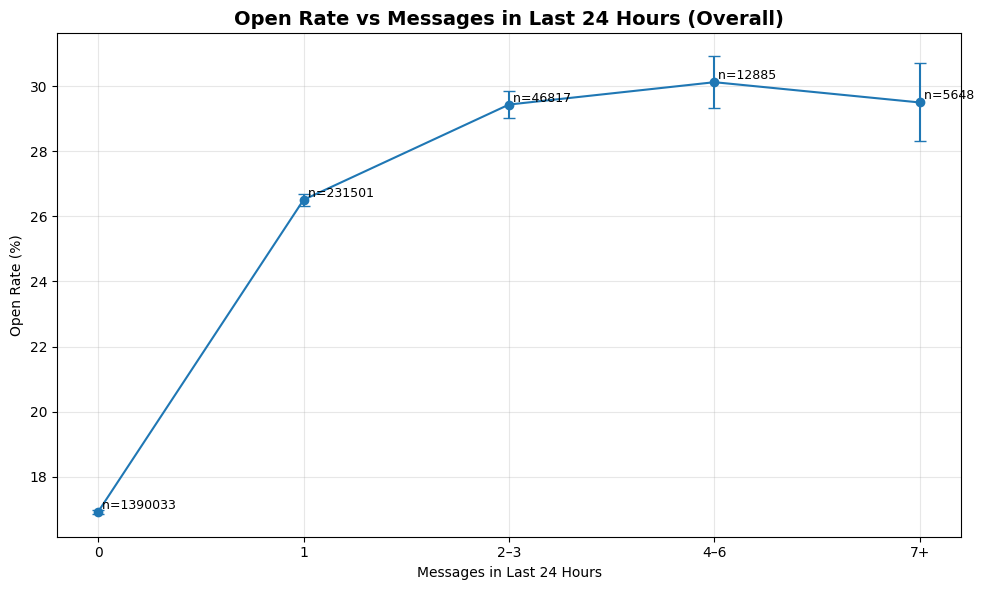

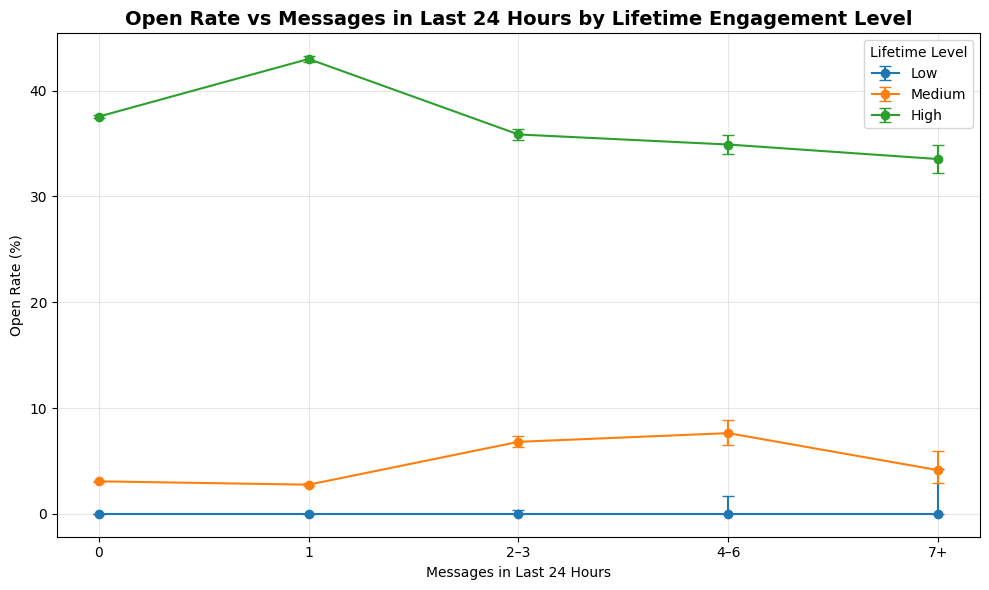

In [13]:
# Ensure messages_last_24hr exists; if not, compute as you did earlier.

# Bucket edges & labels
bins_24h = [-np.inf, 0, 1, 3, 6, np.inf]  # (-inf,0], (0,1], (1,3], (3,6], (6,inf)
labels_24h = ['0', '1', '2–3', '4–6', '7+']

df['ml24_bucket'] = pd.cut(df['messages_last_24hr'], bins=bins_24h, labels=labels_24h, right=True, include_lowest=True)

# Overall
overall_24h = summarize_rate(df, ['ml24_bucket'])

# By lifetime engagement level
by_level_24h = summarize_rate(df, ['lifetime_engagement_level','ml24_bucket'])

# Make category order explicit for plotting
cat = pd.CategoricalDtype(categories=labels_24h, ordered=True)
overall_24h['ml24_bucket'] = overall_24h['ml24_bucket'].astype(cat)
by_level_24h['ml24_bucket'] = by_level_24h['ml24_bucket'].astype(cat)

# --- Plot: Overall ---
fig, ax = plt.subplots(figsize=(10,6))
d = overall_24h.sort_values('ml24_bucket')
ax.errorbar(d['ml24_bucket'].astype(str), d['rate'], 
            yerr=[d['rate']-d['ci_low'], d['ci_high']-d['rate']], 
            fmt='-o', capsize=4)
ax.set_title('Open Rate vs Messages in Last 24 Hours (Overall)', fontsize=14, fontweight='bold')
ax.set_xlabel('Messages in Last 24 Hours')
ax.set_ylabel('Open Rate (%)')
for i, (x, n) in enumerate(zip(d['ml24_bucket'].astype(str), d['n'])):
    ax.text(i, d.loc[d['ml24_bucket'].astype(str)==x, 'rate'].values[0], f" n={n}", va='bottom', fontsize=9)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('openrate_vs_ml24_overall.png', dpi=150, bbox_inches='tight')
plt.show()

# --- Plot: By lifetime engagement level ---
levels = ['low','medium','high']
fig, ax = plt.subplots(figsize=(10,6))
for lvl in levels:
    dd = by_level_24h[by_level_24h['lifetime_engagement_level']==lvl].sort_values('ml24_bucket')
    if dd.empty: 
        continue
    ax.errorbar(dd['ml24_bucket'].astype(str), dd['rate'],
                yerr=[dd['rate']-dd['ci_low'], dd['ci_high']-dd['rate']],
                fmt='-o', capsize=4, label=lvl.capitalize())

ax.set_title('Open Rate vs Messages in Last 24 Hours by Lifetime Engagement Level', fontsize=14, fontweight='bold')
ax.set_xlabel('Messages in Last 24 Hours')
ax.set_ylabel('Open Rate (%)')
ax.legend(title='Lifetime Level')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('openrate_vs_ml24_by_level.png', dpi=150, bbox_inches='tight')
plt.show()


C:\Users\sffra\AppData\Local\Temp\ipykernel_4304\2575513440.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(group_cols, dropna=False)
C:\Users\sffra\AppData\Local\Temp\ipykernel_4304\2575513440.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(group_cols, dropna=False)


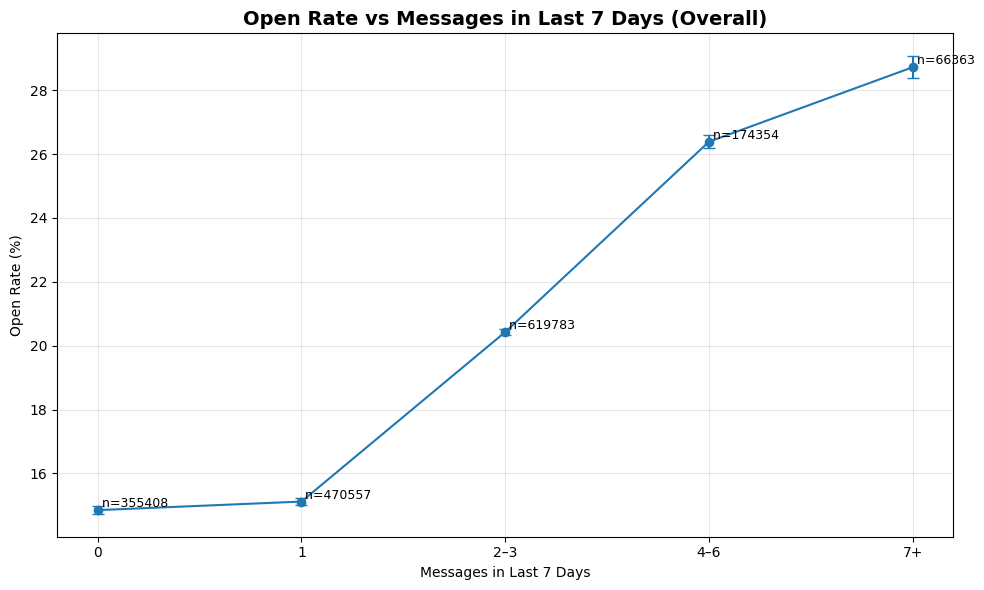

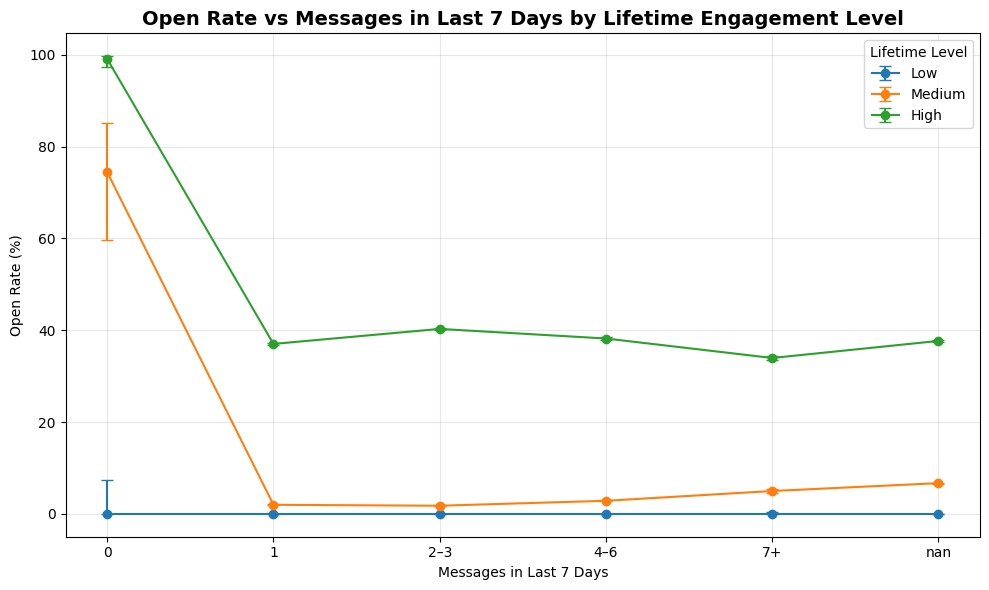

In [14]:
# --- Ensure the weekly feature exists (computed strictly before current msg) ---
# Assumes you've already added `messages_last_week` via your rolling logic.
df_week = df[df['sent_datetime'].notna()].copy()
# Buckets for last week (reuse global thresholds for consistency)
bins_7d   = [-np.inf, 0, 1, 3, 6, np.inf]   # (-inf,0], (0,1], (1,3], (3,6], (6,inf)
labels_7d = ['0', '1', '2–3', '4–6', '7+']

df_week['ml7_bucket'] = pd.cut(
    df['messages_last_week'],
    bins=bins_7d, labels=labels_7d,
    right=True, include_lowest=True
)

# Overall summary
overall_7d = summarize_rate(df_week, ['ml7_bucket'])

# Stratified by lifetime engagement level (build it if missing)
if 'lifetime_engagement_level' not in df.columns:
    per_user = df.groupby('client_id').agg(
        n_messages=('client_id', 'count'),
        opens=('is_opened', 'sum'),
        clicks=('is_clicked', 'sum'),
        purchases=('is_purchased', 'sum')
    )
    per_user['open_rate']     = per_user['opens'] / per_user['n_messages']
    per_user['click_rate']    = per_user['clicks'] / per_user['n_messages']
    per_user['purchase_rate'] = per_user['purchases'] / per_user['n_messages']
    per_user['engagement_score'] = (
        0.4*per_user['open_rate'] + 0.4*per_user['click_rate'] + 0.2*per_user['purchase_rate']
    )
    q_low  = per_user['engagement_score'].quantile(1/3)
    q_high = per_user['engagement_score'].quantile(2/3)
    def _label(s):
        if pd.isna(s): return 'unknown'
        if s <= q_low: return 'low'
        if s <= q_high: return 'medium'
        return 'high'
    per_user['lifetime_engagement_level'] = per_user['engagement_score'].apply(_label)
    df['lifetime_engagement_level'] = df['client_id'].map(per_user['lifetime_engagement_level'])

by_level_7d = summarize_rate(df, ['lifetime_engagement_level', 'ml7_bucket'])

# Make category order explicit
cat7 = pd.CategoricalDtype(categories=labels_7d, ordered=True)
overall_7d['ml7_bucket'] = overall_7d['ml7_bucket'].astype(cat7)
by_level_7d['ml7_bucket'] = by_level_7d['ml7_bucket'].astype(cat7)

# -------- Plot: Overall (7d) ----------
fig, ax = plt.subplots(figsize=(10,6))
d = overall_7d.sort_values('ml7_bucket')
ax.errorbar(
    d['ml7_bucket'].astype(str),
    d['rate'],
    yerr=[d['rate']-d['ci_low'], d['ci_high']-d['rate']],
    fmt='-o', capsize=4
)
ax.set_title('Open Rate vs Messages in Last 7 Days (Overall)', fontsize=14, fontweight='bold')
ax.set_xlabel('Messages in Last 7 Days')
ax.set_ylabel('Open Rate (%)')
for i, (x, n) in enumerate(zip(d['ml7_bucket'].astype(str), d['n'])):
    ax.text(i, d.loc[d['ml7_bucket'].astype(str)==x, 'rate'].values[0], f" n={n}", va='bottom', fontsize=9)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('openrate_vs_ml7_overall.png', dpi=150, bbox_inches='tight')
plt.show()

# -------- Plot: By Lifetime Engagement Level (7d) ----------
levels = ['low','medium','high']
fig, ax = plt.subplots(figsize=(10,6))
for lvl in levels:
    dd = by_level_7d[by_level_7d['lifetime_engagement_level'] == lvl].sort_values('ml7_bucket')
    if dd.empty:
        continue
    ax.errorbar(
        dd['ml7_bucket'].astype(str),
        dd['rate'],
        yerr=[dd['rate']-dd['ci_low'], dd['ci_high']-dd['rate']],
        fmt='-o', capsize=4, label=lvl.capitalize()
    )

ax.set_title('Open Rate vs Messages in Last 7 Days by Lifetime Engagement Level', fontsize=14, fontweight='bold')
ax.set_xlabel('Messages in Last 7 Days')
ax.set_ylabel('Open Rate (%)')
ax.legend(title='Lifetime Level')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('openrate_vs_ml7_by_level.png', dpi=150, bbox_inches='tight')
plt.show()


Bin sizes are weird; an alternative, time-since-last message fatigue analysis?
note this is for some 39000 user_ids

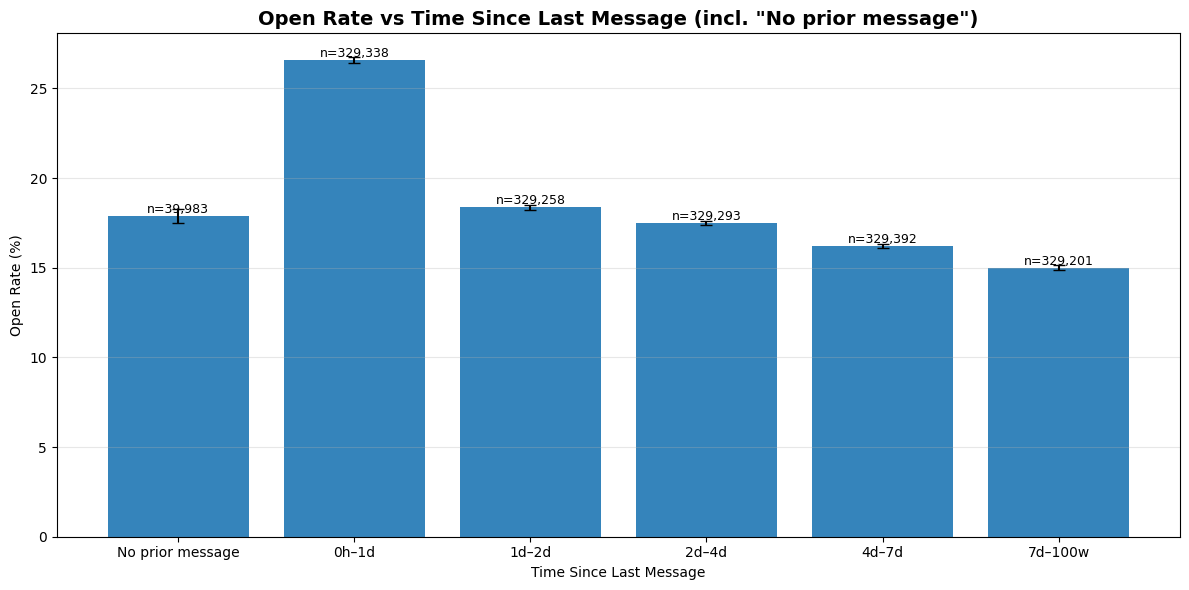

         tslm_label       n       rate     ci_low    ci_high
0  No prior message   39983  17.870095  17.497667  18.248696
1             0h–1d  329338  26.580595  26.429992  26.731745
2             1d–2d  329258  18.376471  18.244550  18.509129
3             2d–4d  329293  17.498094  17.368698  17.628249
4             4d–7d  329392  16.201061  16.075624  16.327287
5           7d–100w  329201  15.009067  14.887468  15.131484

Total rows used (valid sent_datetime): 1686465
Sum across bins: 1686465


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) Ensure recency field exists (strictly before current message)
if 'sent_datetime' not in df.columns:
    df['sent_datetime'] = pd.to_datetime(df['sent_at'])
df = df.sort_values(['client_id','sent_datetime'])
if 'time_since_last_msg_hours' not in df.columns:
    df['prev_sent'] = df.groupby('client_id')['sent_datetime'].shift(1)
    df['time_since_last_msg_hours'] = (df['sent_datetime'] - df['prev_sent']).dt.total_seconds() / 3600.0

# 2) Split into: (A) has prior message vs (B) no prior message
df_valid = df[df['sent_datetime'].notna()].copy()
has_prior = df_valid['time_since_last_msg_hours'].notna()

A = df_valid.loc[has_prior].copy()
B = df_valid.loc[~has_prior].copy()  # "No prior message"

# 3) Build ~equal-sized quantile bins for A
NUM_BINS = 5
A['tslm_qbin'] = pd.qcut(A['time_since_last_msg_hours'], q=NUM_BINS, duplicates='drop')

def _fmt_hours(h):
    if h < 24:  return f"{int(round(h))}h"
    d = h/24
    if d < 7:   return f"{int(round(d))}d"
    w = d/7
    return f"{int(round(w))}w"

cats = A['tslm_qbin'].cat.categories
labels = [f"{_fmt_hours(iv.left)}–{_fmt_hours(iv.right)}" for iv in cats]
label_map = dict(zip(cats, labels))
A['tslm_label'] = A['tslm_qbin'].map(label_map)

# 4) Wilson CI helper + summarizer
def wilson_ci(successes, n, z=1.96):
    successes = np.asarray(successes, float)
    n = np.asarray(n, float)
    phat = np.divide(successes, n, out=np.full_like(successes, np.nan), where=n>0)
    denom = 1 + (z**2)/n
    centre = phat + (z**2)/(2*n)
    adj = z * np.sqrt((phat*(1-phat) + (z**2)/(4*n)) / n)
    lower = (centre - adj) / denom
    upper = (centre + adj) / denom
    return phat, lower, upper

def summarize(df_in, label_col):
    g = (df_in.groupby(label_col, observed=True)
               .agg(n=('client_id','count'),
                    opens=('is_opened','sum'))
               .reset_index())
    rate, lo, hi = wilson_ci(g['opens'], g['n'])
    g['rate'] = rate*100; g['ci_low'] = lo*100; g['ci_high'] = hi*100
    return g

# 5) Summaries: A (quantile bins) + B ("No prior message")
sum_A = summarize(A, 'tslm_label')
sum_A['tslm_label'] = pd.Categorical(sum_A['tslm_label'], categories=labels, ordered=True)
sum_A = sum_A.sort_values('tslm_label')

sum_B = summarize(B.assign(tslm_label='No prior message'), 'tslm_label')

# Combine with desired order
bin_order = ['No prior message'] + labels
summary_all = pd.concat([sum_B, sum_A], ignore_index=True)
summary_all['tslm_label'] = pd.Categorical(summary_all['tslm_label'], categories=bin_order, ordered=True)
summary_all = summary_all.sort_values('tslm_label')

# 6) Plot: bar chart with CIs and n labels
fig, ax = plt.subplots(figsize=(12,6))
x = np.arange(len(summary_all))
ax.bar(x, summary_all['rate'], yerr=[summary_all['rate']-summary_all['ci_low'],
                                     summary_all['ci_high']-summary_all['rate']],
       capsize=4, alpha=0.9)
ax.set_xticks(x)
ax.set_xticklabels(summary_all['tslm_label'].astype(str), rotation=0)
ax.set_title('Open Rate vs Time Since Last Message (incl. "No prior message")', fontsize=14, fontweight='bold')
ax.set_xlabel('Time Since Last Message')
ax.set_ylabel('Open Rate (%)')
ax.grid(True, axis='y', alpha=0.3)

# annotate n on bars
for i, (rate, n) in enumerate(zip(summary_all['rate'], summary_all['n'])):
    ax.text(i, rate, f"n={int(n):,}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('openrate_vs_time_since_last_msg_with_no_prior.png', dpi=150, bbox_inches='tight')
plt.show()

# 7) (Optional) print the table so you can check totals
print(summary_all[['tslm_label','n','rate','ci_low','ci_high']])
print("\nTotal rows used (valid sent_datetime):", len(df_valid))
print("Sum across bins:", int(summary_all['n'].sum()))


In [20]:
df_valid['client_id'].nunique()

39983